Model Comparison:
            Model  Train Accuracy  Test Accuracy  ROC-AUC
0  Decision Tree           1.000          0.553    0.500
1  Random Forest           1.000          0.663    0.500
2           k-NN           0.748          0.590    0.516


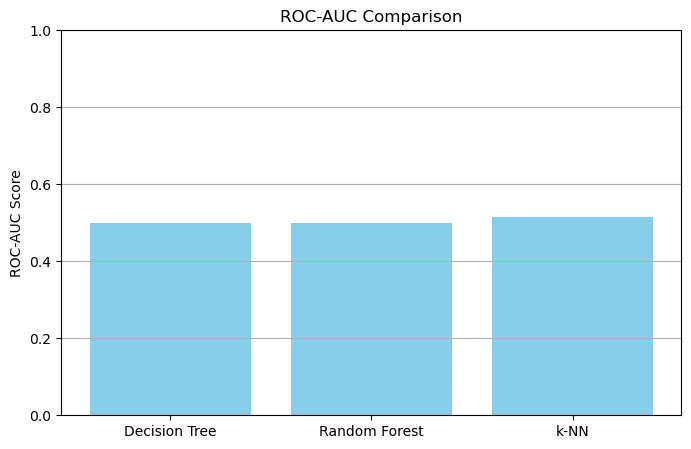

In [5]:
#Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

#Load the updated dataset
df = pd.read_csv("C:/Users/kondu/Downloads/day4_updated_mental_health.csv")

#Define X and y
X = df.drop(columns=['BurnoutLevel', 'BurnoutRisk', 'EmployeeID'], errors='ignore')
y = df['BurnoutRisk']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

results = []

#Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    train_acc = model.score(X_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    results.append({
        'Model': name,
        'Train Accuracy': round(train_acc, 3),
        'Test Accuracy': round(test_acc, 3),
        'ROC-AUC': round(roc_auc, 3)
    })

#Create summary DataFrame
summary_df = pd.DataFrame(results)
print("Model Comparison:\n", summary_df)

#Plot ROC-AUC Comparison
plt.figure(figsize=(8, 5))
plt.bar(summary_df['Model'], summary_df['ROC-AUC'], color='skyblue')
plt.title("ROC-AUC Comparison")
plt.ylabel("ROC-AUC Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [6]:
import pandas as pd
from IPython.display import FileLink
output_path = "day5_updated_mental_health.csv"
df.to_csv(output_path, index=False)

print("Day 5 updated dataset saved successfully.")
FileLink(output_path)


Day 5 updated dataset saved successfully.


C:\Users\kondu\day5_updated_mental_health.csv